In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
def plot_loss(loss, style):
    plt.figure(figsize=(10,5))
    plt.xlabel('epochs')
    plt.ylabel("Loss")
    plt.plot(loss, style)
    plt.grid()
    
def plot_theta_loss(mtheta_0, xlbl, loss, style):
    plt.figure(figsize=(10,5))
    plt.xlabel(xlbl)
    plt.ylabel("Loss")
    plt.plot(mtheta_0, loss, marker = "o")
    plt.grid()

In [15]:
def BFGS_Costfn(X2, y2, eps,epoc, learn_rate = 1):

    j = []
    theta = []
    d_theta = []
    x0 = np.ones((len(X2),1))
    X_2 = np.concatenate((x0,X2), axis = 1)

    th_prev = np.zeros((X_2.shape[1],1))
    th_curr = 0.01 * np.ones((X_2.shape[1],1))
    
    theta.append(th_prev)
    theta.append(th_curr)
    
    all_thetas = np.concatenate((th_prev, th_curr), axis = 1)
    #########################################
    B_inv = np.identity(len(th_prev))
    I = np.identity(len(th_prev))
    #########################################
    for i in range(epoc):    
        print(f"****************** Iteration {i+1} ********************")
        
        #step2
        y_pred = X_2 @ theta[i]
        print('y_predicted: \n', y_pred)
        print()
        
        #step3
        e = y_pred - y2.reshape(len(X_2),1)
        err = (1/(2*len(y2))) * np.linalg.norm(e)**2
        j.append(err)
        print('cost: \n', err)
        print()
        
        #step4
        d_th = ((1/len(y2)) * sum(X_2 * e)).reshape(len(theta[i]),1)
        d_theta.append(d_th)
        Xnext_norm = np.linalg.norm(d_theta[i])
        print('theta norm: \n', Xnext_norm)
        print()
        
        if ((i>0) and (Xnext_norm >= epsilon)):
            
            y = (d_theta[i] - d_theta[i-1])
            dx = theta[i] - theta[i-1]

            B_inv = ((I - ((dx @ y.T)/ (y.T @ dx))) @ B_inv @ (I - ((y @ dx.T)/(y.T @ dx)))) + ((dx @ dx.T)/(y.T @ dx))
            
            th = theta[i] - (learn_rate * (B_inv @ d_th))
            theta.append(th)
            print('new theta: \n', th)
            print()
            
            all_thetas = np.concatenate((all_thetas, th), axis = 1)
        
        elif(Xnext_norm < epsilon):
            break

    print("****************** Training Report ********************")
    print("Iteration: ",i+1)
    print("xprev\n", theta[i-1])
    print("xcurrent\n", theta[i])
    print("Dfx_prev\n", d_theta[i-1])
    print("Dfx_current\n", d_theta[i])
    print("norm: ", Xnext_norm)
    print("***************")
    print("xmin\n", theta[i])
    print("gradient\n", d_theta[i])
    
    return theta, d_theta, j, y_pred, all_thetas

In [16]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

X = data[:,:-1]
y = data[:,-1]
len(X)
print(X)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


In [17]:
epsilon = 0.001
th, d_th, cost , h_x, all_th= BFGS_Costfn(X, y, epsilon, 1000)

****************** Iteration 1 ********************
y_predicted: 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

cost: 
 13405.98

theta norm: 
 22917.545989219703

****************** Iteration 2 ********************
y_predicted: 
 [[2.29]
 [2.75]
 [2.71]
 [2.95]
 [2.1 ]
 [1.55]
 [2.21]
 [1.64]
 [2.57]
 [2.38]
 [2.13]
 [2.1 ]
 [2.8 ]
 [2.33]
 [2.22]
 [2.79]
 [2.22]
 [2.65]
 [2.67]
 [2.39]
 [2.59]
 [2.58]
 [2.47]
 [2.31]
 [2.85]]

cost: 
 13010.421858

theta norm: 
 22576.758238465678

new theta: 
 [[ 0.56036482]
 [-3.45851851]
 [-4.06799334]
 [ 9.32117504]]

****************** Iteration 3 ********************
y_predicted: 
 [[121.73717449]
 [187.80400832]
 [161.47057722]
 [201.99674467]
 [132.08320606]
 [142.79581743]
 [178.62155864]
 [169.47287026]
 [217.20353431]
 [262.84127236]
 [157.60883184]
 [183.81145508]
 [140.68570486]
 [ 82.34371337]
 [188.55220851]
 [211.6995401 ]
 [ 59.

In [18]:
r2_score(y, h_x)

0.9896615789448354

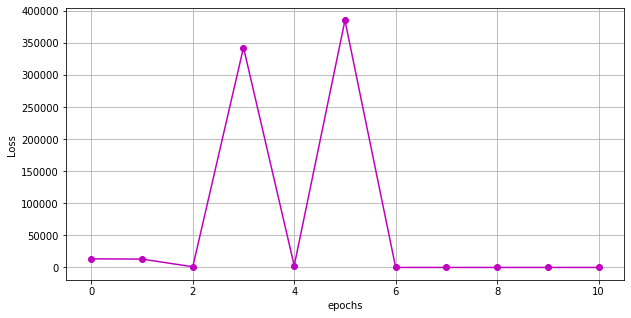

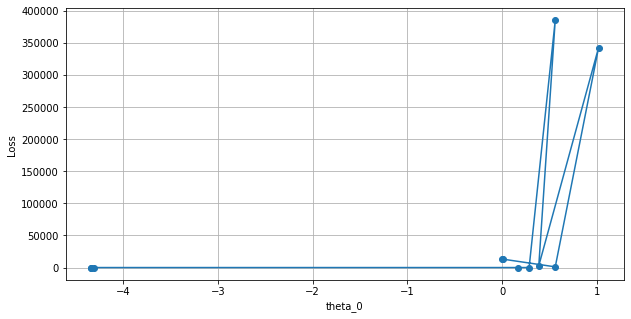

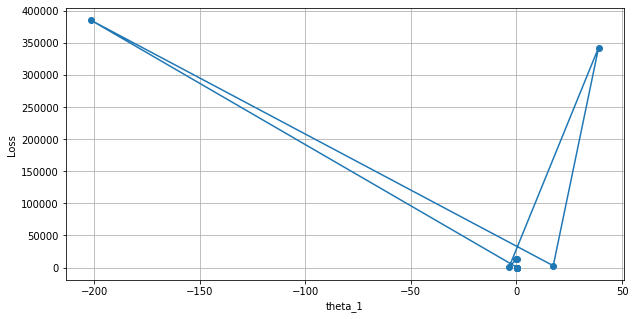

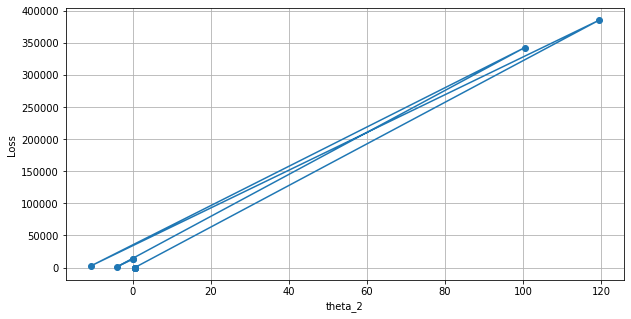

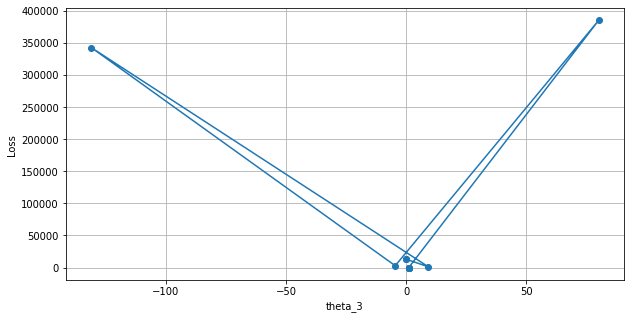

In [19]:
plot_loss(cost, "mo-")
plot_theta_loss(all_th[0], 'theta_0', cost, "bo-")
plot_theta_loss(all_th[1], 'theta_1', cost, "bo-")
plot_theta_loss(all_th[2], 'theta_2', cost, "bo-")
plot_theta_loss(all_th[3], 'theta_3', cost, "bo-")